In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import itertools
from random import random
from random import seed
from random import randrange
from csv import reader
from math import sqrt,exp,pi
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [64]:
def val_minmax(dataset):
    minimum_maximum=[]
    for i in range(len(dataset[0])):
        column_values=[row[i] for row in dataset]
        minval=min(column_values)
        maxval = max(column_values)
        minimum_maximum.append([minval,maxval])
    return minimum_maximum


In [65]:
def cross_val_split(dataset,n_folds):
    split_dataset=[]
    copy_dataset=list(dataset)
    fold_size=int(len(dataset)/n_folds)
    for _ in range(n_folds):
        fold=[]
        while len(fold)<fold_size:
            index=randrange(len(copy_dataset))
            fold.append(copy_dataset.pop(index))
        split_dataset.append(fold)
    return split_dataset

In [66]:

def norm_dataset(dataset,minmax):
    for line in dataset:
        for i in range(len(line)):
            line[i]=(line[i]-minmax[i][0])/(minmax[i][1] -minmax[i][0])

In [67]:
#KNN Algo

def knn(train,test,num_neighbors):
    predictions=[]
    for test_row in test:
        distances=[]
        for train_row in train:
            I_dist=0.0
            for i in range(len(test_row)-1):
                I_dist +=(test_row[i]-train_row[i])**2
            dist=sqrt(I_dist)
            distances.append((train_row,dist))
            distances.sort(key=lambda tup:tup[1])
        neighbors_list=[]
        for i in range(num_neighbors):
            neighbors_list.append(distances[i][0])
        neighbors=neighbors_list
        output_values=[row[-1] for row in neighbors]
        prediction=max(set(output_values),key=output_values.count)
        out_val=prediction
        
        predictions.append(out_val)
    return(predictions)


In [68]:
#LR Algo

def logistic_regression(train,test,l_rate,n_epoch):
    predictions=[]
    coef1=[0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            out1=coef1[0]
            for i in range(len(row)-1):
                out1 +=coef1[i+1]*row[i]
            out =1.0/(1.0 +exp(-out1))
            error=row[-1]-out
            coef1[0]=coef1[0]+l_rate *error*out*(1.0 - out )
            for i in range(len(row)-1):
                coef1[i + 1] = coef1[i + 1] + l_rate * error * out * (1.0 - out) * row[i]
    coef=coef1
    for row in test:
        out1=coef1[0]
        for i in range(len(row)-1):
            out1+=coef1[i+1]*row[i]
        out =1.0 /(1.0+exp(-out1))
        out=round(out)
        predictions.append(out)
    return(predictions)
        

In [69]:
def cal_accuracy_metric(actual_val, pred_val):
    right = 0
    for i in range(len(actual_val)):
        if actual_val[i] == pred_val[i]:
            right = right + 1
    res = right / float(len(actual_val)) * 100.0
    return res 

In [70]:




def eval_algo(dataset, algorithm, n_folds, *args):
    folds = cross_val_split(dataset, n_folds)
    scores = []
    f1_scores = []
    for fold in folds:
        train_dataset = list(folds)
        train_dataset.remove(fold)
        train_dataset = sum(train_dataset, [])
        test_dataset = list()
        for line in fold:
            line_copy = list(line)
            test_dataset.append(line_copy)
            line_copy[-1] = None
        pred_val = algorithm(train_dataset, test_dataset, *args)
        actual_val = [row[-1] for row in fold]
        conf_matrix = confusion_matrix(actual_val, pred_val)
        f1 = f1_score(actual_val, pred_val, average='macro')
        f1_scores.append(f1 * 100.0)
        accuracy = cal_accuracy_metric(actual_val, pred_val)
        scores.append(accuracy)
    return scores,f1_scores,conf_matrix

In [71]:
df = pd.read_csv('breast-cancer.data',header=None)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df = df.drop(columns = 0,axis = 1)
dataset = df.values.tolist()
minmax = val_minmax(dataset)
norm_dataset(dataset,minmax)
#print(dataset)

In [ ]:
#KNN ACCURACY


n_folds = 6
num_neighbors = 100
scores1,f1_scores1,conf_matrix1 = eval_algo(dataset, knn, n_folds, num_neighbors)
print('Scores: %s' % scores1)
print('Mean Accuracy: %.3f%%' % (sum(scores1)/float(len(scores1))))


In [45]:
#KNN F1 SCORES

print('f1_scores: %s' % f1_scores1)
print('F1 Scores: %.3f%%' % (sum(f1_scores1)/float(len(f1_scores1))))

f1_scores: [94.25813008130082, 95.43212870886894, 96.81779780343565, 97.77734067663258, 94.12681912681913, 93.01545253863135]
F1 Scores: 95.238%


In [46]:
#KNN Confusion Matrix
print(conf_matrix1)

[[72  0]
 [ 7 34]]


In [58]:
#LR ACCURACY

n_folds = 6
l_rate = 0.1
n_epoch = 100
scores2,f1_scores2,conf_matrix2 = eval_algo(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores2)
print('Mean Accuracy: %.3f%%' % (sum(scores2)/float(len(scores2))))

Scores: [97.34513274336283, 99.11504424778761, 98.23008849557522, 93.80530973451327, 97.34513274336283, 97.34513274336283]
Mean Accuracy: 97.198%


In [59]:
#LR F1 SCORES

print('f1_scores: %s' % f1_scores2)
print('F1 Scores: %.3f%%' % (sum(f1_scores2)/float(len(f1_scores2))))


f1_scores: [96.87067294378289, 99.03788846317582, 98.01754385964911, 93.67857428274596, 97.08085765951951, 97.00662251655629]
F1 Scores: 96.949%


In [60]:
#LR Confusion Matrix
print(conf_matrix2)


[[74  3]
 [ 0 36]]


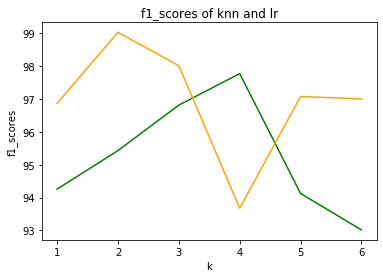

In [61]:
k = [1,2,3,4,5,6]
plt.plot(k,f1_scores1,color='g')
plt.plot(k,f1_scores2,color='orange')
plt.xlabel('k')
plt.ylabel('f1_scores')
plt.title('f1_scores of knn and lr')
plt.show()

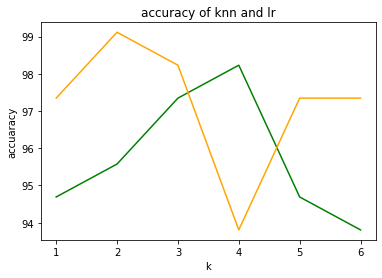

In [62]:
k = [1,2,3,4,5,6]
plt.plot(k,scores1,color='g')
plt.plot(k,scores2,color='orange')
plt.xlabel('k')
plt.ylabel('accuaracy')
plt.title('accuracy of knn and lr')
plt.show()